<a href="https://colab.research.google.com/github/3umin/DL4AI_Class/blob/main/week2/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [34]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
print('train셋 크기 :', len(train_labels), 'test셋 크기 :', len(test_labels))

train셋 크기 : 60000 test셋 크기 : 10000


In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
test_images.shape

(10000, 28, 28)

In [39]:
len(test_labels)

10000

In [40]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [42]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

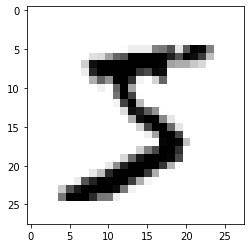

In [43]:
# 255로 나누기 전

import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [44]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

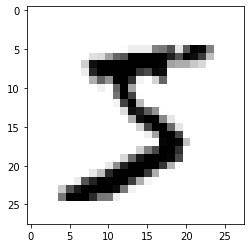

In [45]:
# 255로 나누고 나서 -> 값의 스케일만 조정하기 때문에 그래프 그릴 때는 달라지지 않는다. 값의 스케일만 줄이는 용도
# Gradient Descent 알고리즘이 Normalized 된 데이터에 대해 최적화를 진행하기 때문에, 표준화시키지 않으면 성능이 안좋아질 수 있음

import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [46]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [47]:
train_images[0].shape

(784,)

**"Fitting" the model**

In [48]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2617 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1074 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9885


**Using the model to make predictions**

In [49]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 62ms/step


array([6.3111351e-08, 4.4254339e-10, 5.2994315e-06, 5.6851295e-06,
       9.8401181e-13, 5.1597695e-08, 1.4485476e-12, 9.9998868e-01,
       2.4081720e-08, 1.7861447e-07], dtype=float32)

In [50]:
predictions[0].argmax()

7

In [51]:
predictions[0][7]

0.9999887

In [52]:
test_labels[0]

7

**Evaluating the model on new data**

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9805
test_acc: 0.9804999828338623


## 정규화 이전 / 이후 비교

In [92]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [94]:
from tensorflow import keras
from tensorflow.keras import layers
model_1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_1.compile(optimizer = 'rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [95]:
from tensorflow import keras
from tensorflow.keras import layers
model_2 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_2.compile(optimizer = 'rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images_2 = train_images.copy()
test_images_2 = test_images.copy()
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [97]:
model_1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2659 - accuracy: 0.9230
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0512 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0379 - accuracy: 0.9887


In [98]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0673 - accuracy: 0.9784
test_acc: 0.9783999919891357


In [99]:
model_2.fit(train_images_2, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 5.6807 - accuracy: 0.8981
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6619 - accuracy: 0.9539
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4653 - accuracy: 0.9661
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.9730
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2950 - accuracy: 0.9768


In [101]:
test_loss, test_acc = model_2.evaluate(test_images_2, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.6653 - accuracy: 0.9622
test_acc: 0.9621999859809875


## 뉴런 사이즈 비교 (512 / 300)

In [102]:
from tensorflow import keras
from tensorflow.keras import layers
model_1 = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_1.compile(optimizer = 'rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [103]:
from tensorflow import keras
from tensorflow.keras import layers
model_2 = keras.Sequential([
    layers.Dense(300, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model_2.compile(optimizer = 'rmsprop',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [104]:
model_1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.2646 - accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0703 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9883


In [105]:
model_2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2887 - accuracy: 0.9186
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.9632
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9752
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0622 - accuracy: 0.9816
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0481 - accuracy: 0.9859


In [108]:
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print(f"test_acc_512: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9807
test_acc_512: 0.9807000160217285


In [109]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f"test_acc_300: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9782
test_acc_300: 0.9782000184059143


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [54]:
import numpy as np
x = np.array(12)
x

array(12)

In [55]:
x.ndim

0

### Vectors (rank-1 tensors)

In [56]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [57]:
x.ndim

1

### Matrices (rank-2 tensors)

In [58]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [59]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [121]:
x_ex = np.array([[[1, 2, 3, 4, 5, 6],
                  [1, 2, 3, 4, 5, 6],
                  [1, 2, 3, 4, 5, 6]],
                 [[7, 8, 9, 10, 11, 12],
                  [7, 8, 9, 10, 11, 12],
                  [7, 8, 9, 10, 11, 12]],
                 [[1, 3, 5, 7, 8, 9],
                  [1, 3, 5, 7, 8, 9],
                  [1, 2, 3, 5, 6, 7]]])

x_ex.ndim

3

### Key attributes

In [60]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [61]:
train_images.ndim

3

In [62]:
train_images.shape

(60000, 28, 28)

In [63]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

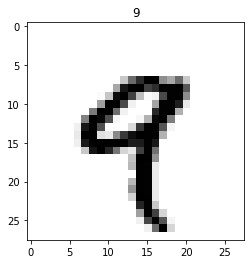

In [66]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.title(train_labels[4])
plt.show()

### Manipulating tensors in NumPy

In [115]:
train_images = train_images.reshape(60000, 28, 28)

In [116]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [117]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [118]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [119]:
my_slice = train_images[:, 14:, 14:]

In [120]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [122]:
batch = train_images[:128]

In [123]:
batch = train_images[128:256]

In [124]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [125]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    # 이중 for문으로 속도가 느림
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [145]:
import numpy as np
x = np.array([[1, 2, 3], [1, 0, -4]])

print(naive_relu(x))
print(x)

[[1 2 3]
 [1 0 0]]
[[ 1  2  3]
 [ 1  0 -4]]


In [147]:
def naive_relu_1(x):
    assert len(x.shape) == 2
    # x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

import numpy as np
x = np.array([[1, 2, 3], [1, 0, -4]])

print(naive_relu_1(x))
print(x)

[[1 2 3]
 [1 0 0]]
[[1 2 3]
 [1 0 0]]


In [126]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [127]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))
# Vetorized 연산은 속도가 빠름름

Took: 0.01 s


In [128]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 1.98 s


### Broadcasting

In [129]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [130]:
y = np.expand_dims(y, axis=0)

In [131]:
Y = np.concatenate([y] * 32, axis=0)

In [132]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [133]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [134]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [135]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [136]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [137]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [138]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [139]:
train_images = train_images.reshape((60000, 28 * 28))

In [140]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [141]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [142]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary